# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/simple_RE_config.yml'

loaded_info = parse_config_for_analysis(config_path)


C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:22: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


load pretrained_model:  ./models/small_lm_test.pt
load pretrained_model:  ./models/small_lm_test_rationalized.pt
2


## Perplexity and Accuracy

In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cpu")
lm = loaded_info["lightning_language_model_no_RE"].to("cpu")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]

In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE


lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\gerso\anaconda3\envs\CDM\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.84it/s]

{'mean_acc': {'mean': 0.32223308086395264, 'std': 0.0}, 'mean_perplexity': {'mean': 38.91814041137695, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.5851693153381348, 'std': 0.0}}
{'mean_acc': tensor(0.3679), 'mean_perplexity': tensor(28.5715, grad_fn=<AddBackward0>), 'mean_mask_percentage': 0}


## Change in perplexity

In [5]:
### Next we test what happens if we check te change in perplexity of the RE. 
from utils.analysis import calc_change_in_perplexity_experiment
change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=1)

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis

rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

{'abs_average': tensor(41.6589), 'rel_average': tensor(0.5159), 'abs_pos_count': Counter({0.0: 4893, 14.0: 103, 8.0: 102, 5.0: 99, 7.0: 97, 3.0: 96, 20.0: 95, 21.0: 94, 6.0: 91, 24.0: 90, 13.0: 87, 19.0: 87, 11.0: 86, 15.0: 86, 10.0: 85, 4.0: 85, 12.0: 84, 17.0: 84, 30.0: 83, 23.0: 82, 18.0: 82, 9.0: 80, 45.0: 80, 22.0: 79, 16.0: 75, 36.0: 75, 35.0: 75, 2.0: 73, 26.0: 73, 34.0: 73, 47.0: 72, 40.0: 72, 39.0: 72, 46.0: 72, 42.0: 71, 33.0: 70, 31.0: 69, 28.0: 69, 32.0: 69, 41.0: 67, 38.0: 67, 25.0: 67, 29.0: 67, 1.0: 65, 37.0: 65, 44.0: 64, 27.0: 61, 49.0: 56, 68.0: 55, 48.0: 55, 76.0: 55, 65.0: 54, 64.0: 54, 78.0: 54, 43.0: 53, 69.0: 53, 72.0: 52, 55.0: 52, 70.0: 51, 63.0: 51, 58.0: 51, 75.0: 51, 61.0: 51, 51.0: 51, 56.0: 51, 77.0: 50, 52.0: 49, 73.0: 49, 71.0: 49, 62.0: 48, 66.0: 47, 60.0: 46, 59.0: 45, 53.0: 45, 74.0: 45, 50.0: 44, 67.0: 44, 54.0: 44, 122.0: 38, 85.0: 38, 57.0: 37, 99.0: 37, 90.0: 37, 103.0: 37, 93.0: 35, 115.0: 35, 94.0: 34, 79.0: 34, 116.0: 33, 109.0: 33, 87.0: 33, 8

<BarContainer object of 11 artists>

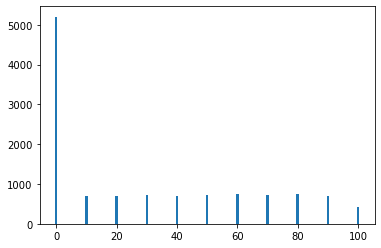

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
plt.bar(relative_counts.keys(),relative_counts.values())

<BarContainer object of 172 artists>

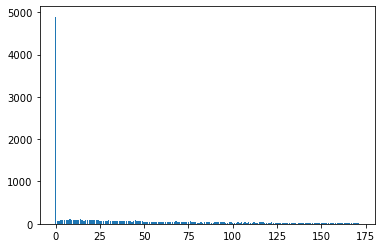

In [8]:
abs_pos_count = rational_distributions["abs_pos_count"]
plt.bar(abs_pos_count.keys(),abs_pos_count.values())

## Analysing some examples

In [9]:
examples = ["How are you doing?", "What did you do today?", "How's work?", "Would you like some coffee?"]

In [15]:
## First with greedy rationals
completed_dialogues_chance = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)
completed_dialogues_greedy = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=True)

In [ ]:
from utils.analysis import pretty_print_completed_dialogues

In [17]:
pretty_print_completed_dialogues(completed_dialogues_greedy)

context ----> response
[MASK] [MASK] [MASK] [MASK] [MASK] ------> sure , i am going to go to work as
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] i [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> i ' m going to make a new account .
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] i [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . ------> i want to see them . [SEP] you ’ re
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] i [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . i [MASK] [MASK] [MASK] [MASK] . [SEP] [MASK] [MASK] [MASK] ------> i ’ ve got some money . [SEP] you are
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> i see . [SEP] what about this one ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [SEP] [MASK] [MASK] [MASK] [MASK] [MASK] [SEP] ------> yes , we have a good day . [SEP] do
[MASK] [MASK] [MASK] [MASK] [MASK] 

In [18]:
pretty_print_completed_dialogues(completed_dialogues_chance)

context ----> response
[MASK] [MASK] [MASK] doing [MASK] ------> you see ! [SEP] i ' m sorry , sir
[MASK] [MASK] you [MASK] ? [MASK] see [MASK] [MASK] i [MASK] [MASK] [MASK] , [MASK] ------> ok . what do you mean ? [SEP] i think
how are you [MASK] [MASK] you see [MASK] [SEP] i [MASK] [MASK] [MASK] [MASK] sir ok . [MASK] do [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> thanks . [SEP] what ' s up ? [SEP] i
how are [MASK] [MASK] ? you [MASK] [MASK] [SEP] [MASK] [MASK] m sorry [MASK] [MASK] [MASK] . [MASK] [MASK] [MASK] [MASK] [MASK] [SEP] [MASK] think thanks . [SEP] what ' [MASK] up [MASK] [MASK] i ------> ' m going to be my friend and my parents
[MASK] [MASK] [MASK] do today [MASK] ------> i am really excited about your new company right away
[MASK] [MASK] you [MASK] today ? [MASK] [MASK] [MASK] [MASK] about [MASK] new [MASK] right [MASK] ------> how about a friend , too ? [SEP] i ’
[MASK] did [MASK] [MASK] today ? i am [MASK] [MASK] about [MASK] [MASK] [MASK] [MASK] [MASK] how about